In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [33]:
df = pd.read_csv('../data/data_cleaned.csv', encoding='utf-8', sep=';')

In [34]:
df.head()

,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,NonResidential,Hotel,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,NonResidential,Hotel,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,NonResidential,Hotel,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,NonResidential,Hotel,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


In [35]:
numeric_cols = df.select_dtypes(include='number').columns.to_list()
cat_cols = df.select_dtypes(include='object').columns.to_list()

## Analyse univariée

In [36]:
df[numeric_cols].describe().round(2)

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1645.00,1645.00,1645.00,1643.00,1645.00,1645.00,1645.00,1645.00,1075.00,1642.00,...,1643.00,1.643000e+03,1.642000e+03,1.643000e+03,1.643000e+03,1.643000e+03,1643.00,1.643000e+03,1643.00,1643.00
mean,47.62,-122.33,1961.74,1.17,4.12,118839.21,12914.78,105924.43,65.67,71.76,...,177.62,8.412275e+06,8.027525e+06,5.197480e+05,1.717076e+06,5.858664e+06,19212.86,1.921286e+06,183.00,1.59
std,0.05,0.02,32.79,2.95,6.59,298963.65,42394.67,285689.11,28.27,74.07,...,186.70,3.042754e+07,2.214985e+07,5.552091e+06,6.135325e+06,2.093373e+07,93904.49,9.390449e+06,755.60,2.32
min,47.50,-122.41,1900.00,0.00,0.00,11285.00,0.00,10925.00,1.00,0.00,...,-2.10,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.00,0.000000e+00,-0.80,-0.02
25%,47.59,-122.34,1930.00,1.00,1.00,29380.00,0.00,28320.00,49.00,33.60,...,79.05,1.218928e+06,1.285411e+06,0.000000e+00,2.106660e+05,7.187925e+05,0.00,0.000000e+00,19.81,0.34
50%,47.61,-122.33,1965.00,1.00,2.00,49066.00,0.00,47215.00,73.00,51.50,...,133.30,2.502081e+06,2.653285e+06,0.000000e+00,4.658685e+05,1.589543e+06,4902.26,4.902260e+05,49.25,0.87
75%,47.65,-122.32,1989.00,1.00,4.00,105100.00,0.00,94900.00,89.00,80.57,...,203.75,6.840378e+06,7.046408e+06,0.000000e+00,1.412999e+06,4.821154e+06,14651.50,1.465150e+06,135.02,1.87
max,47.73,-122.26,2015.00,111.00,99.00,9320156.00,512608.00,9320156.00,100.00,834.40,...,2620.00,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2979090.00,2.979090e+08,16870.98,34.09


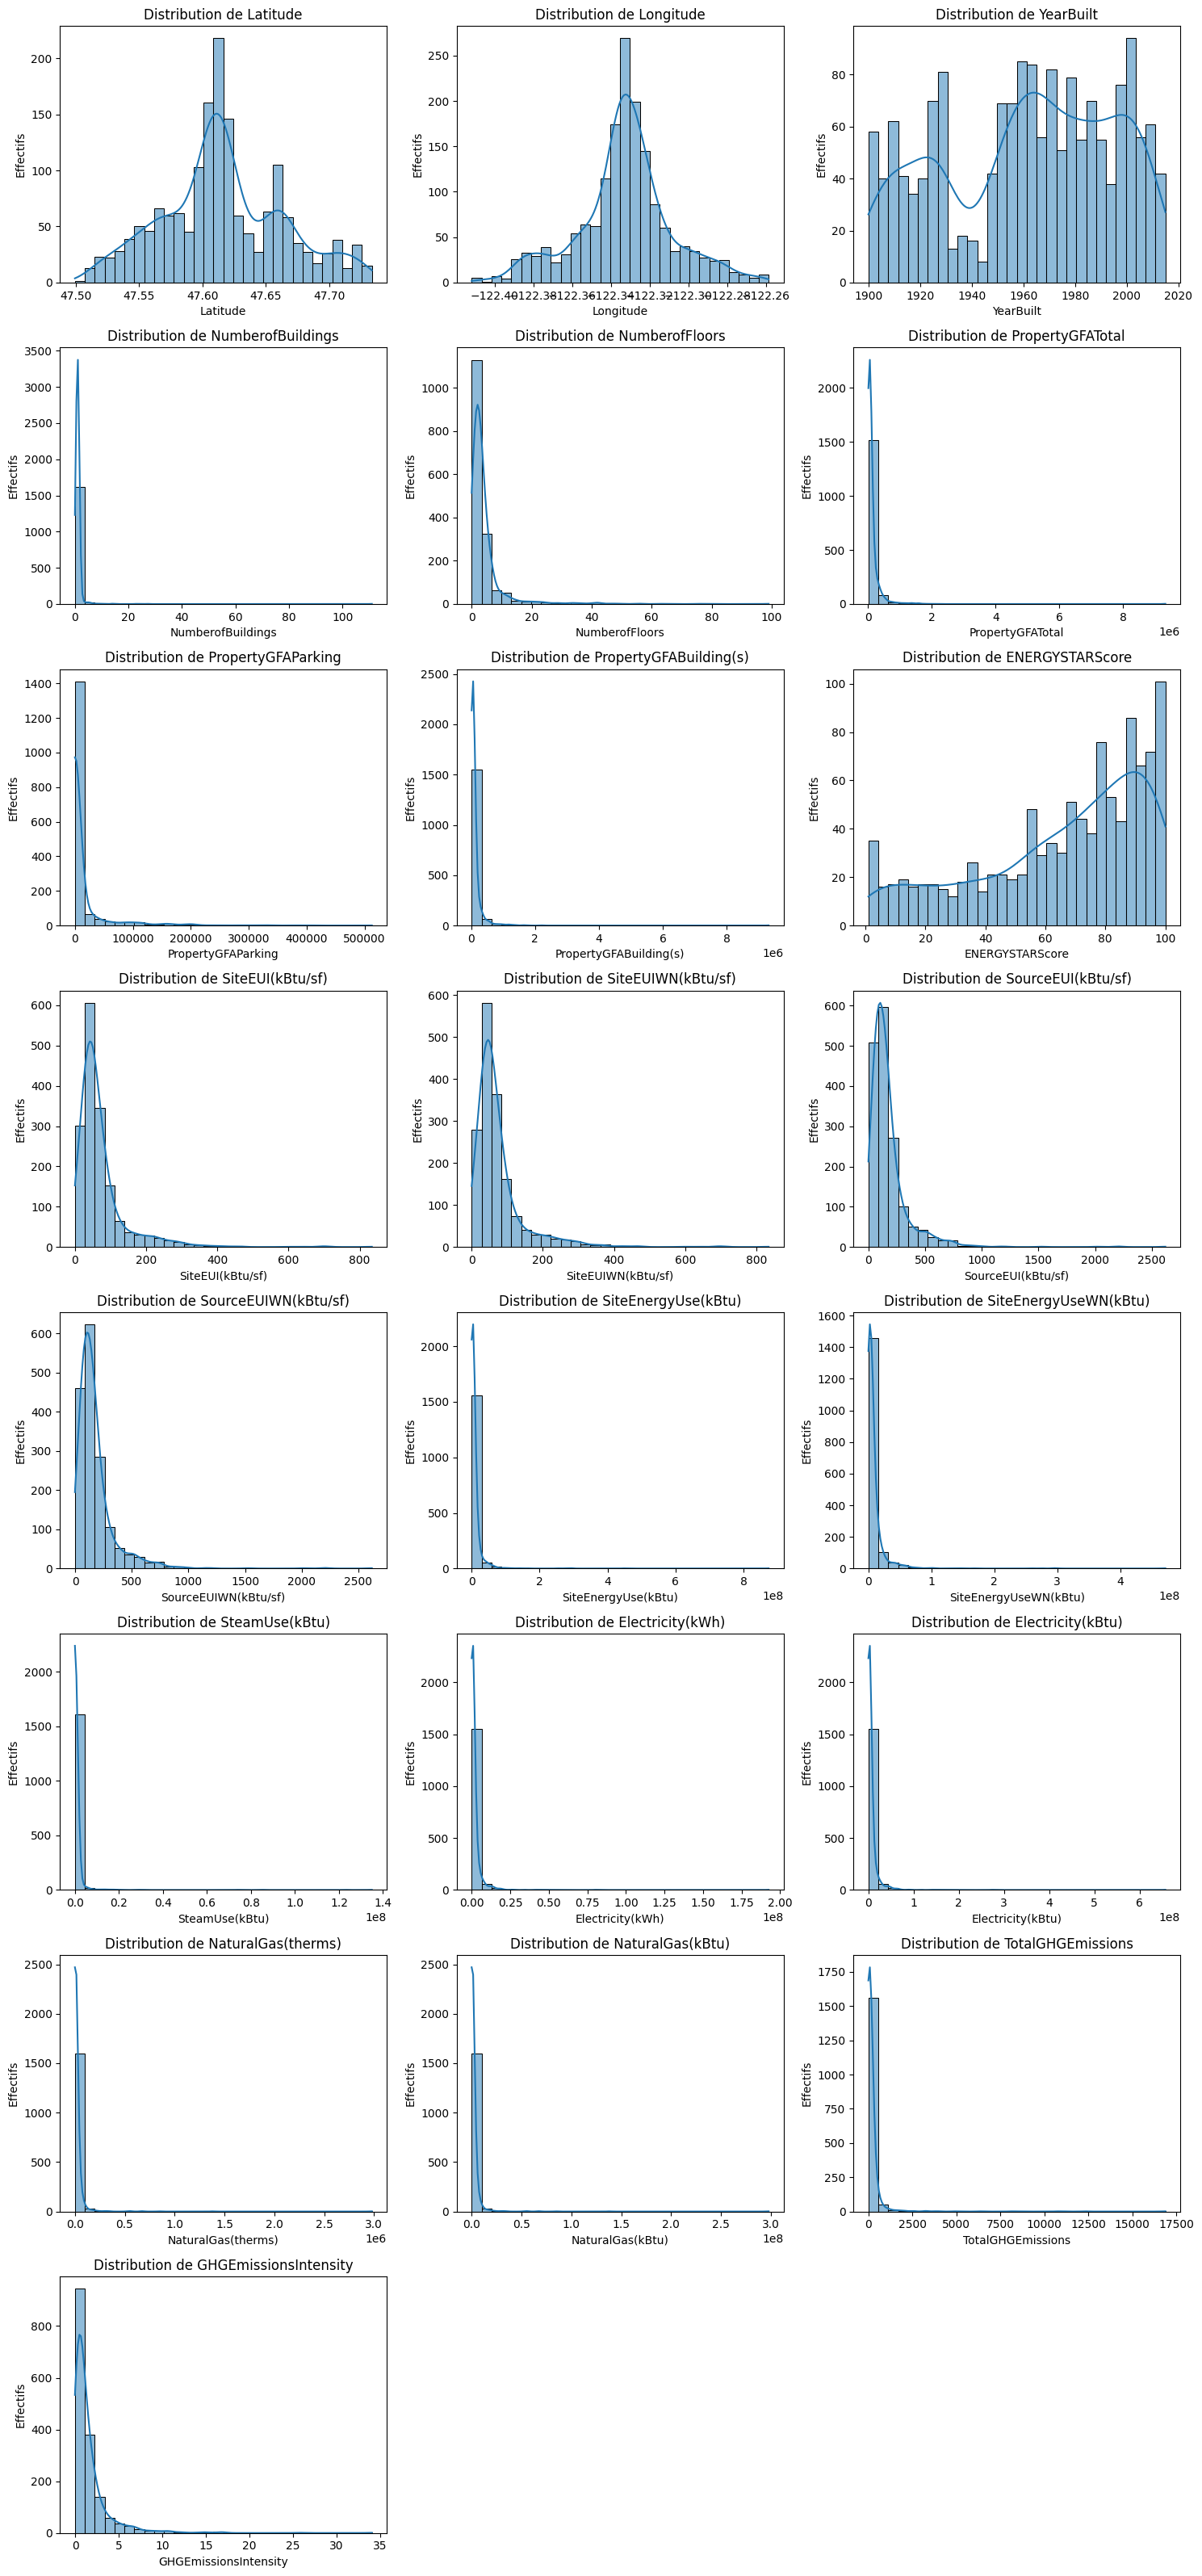

In [37]:
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_ylabel('Effectifs')
    axes[i].set_title(f'Distribution de {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

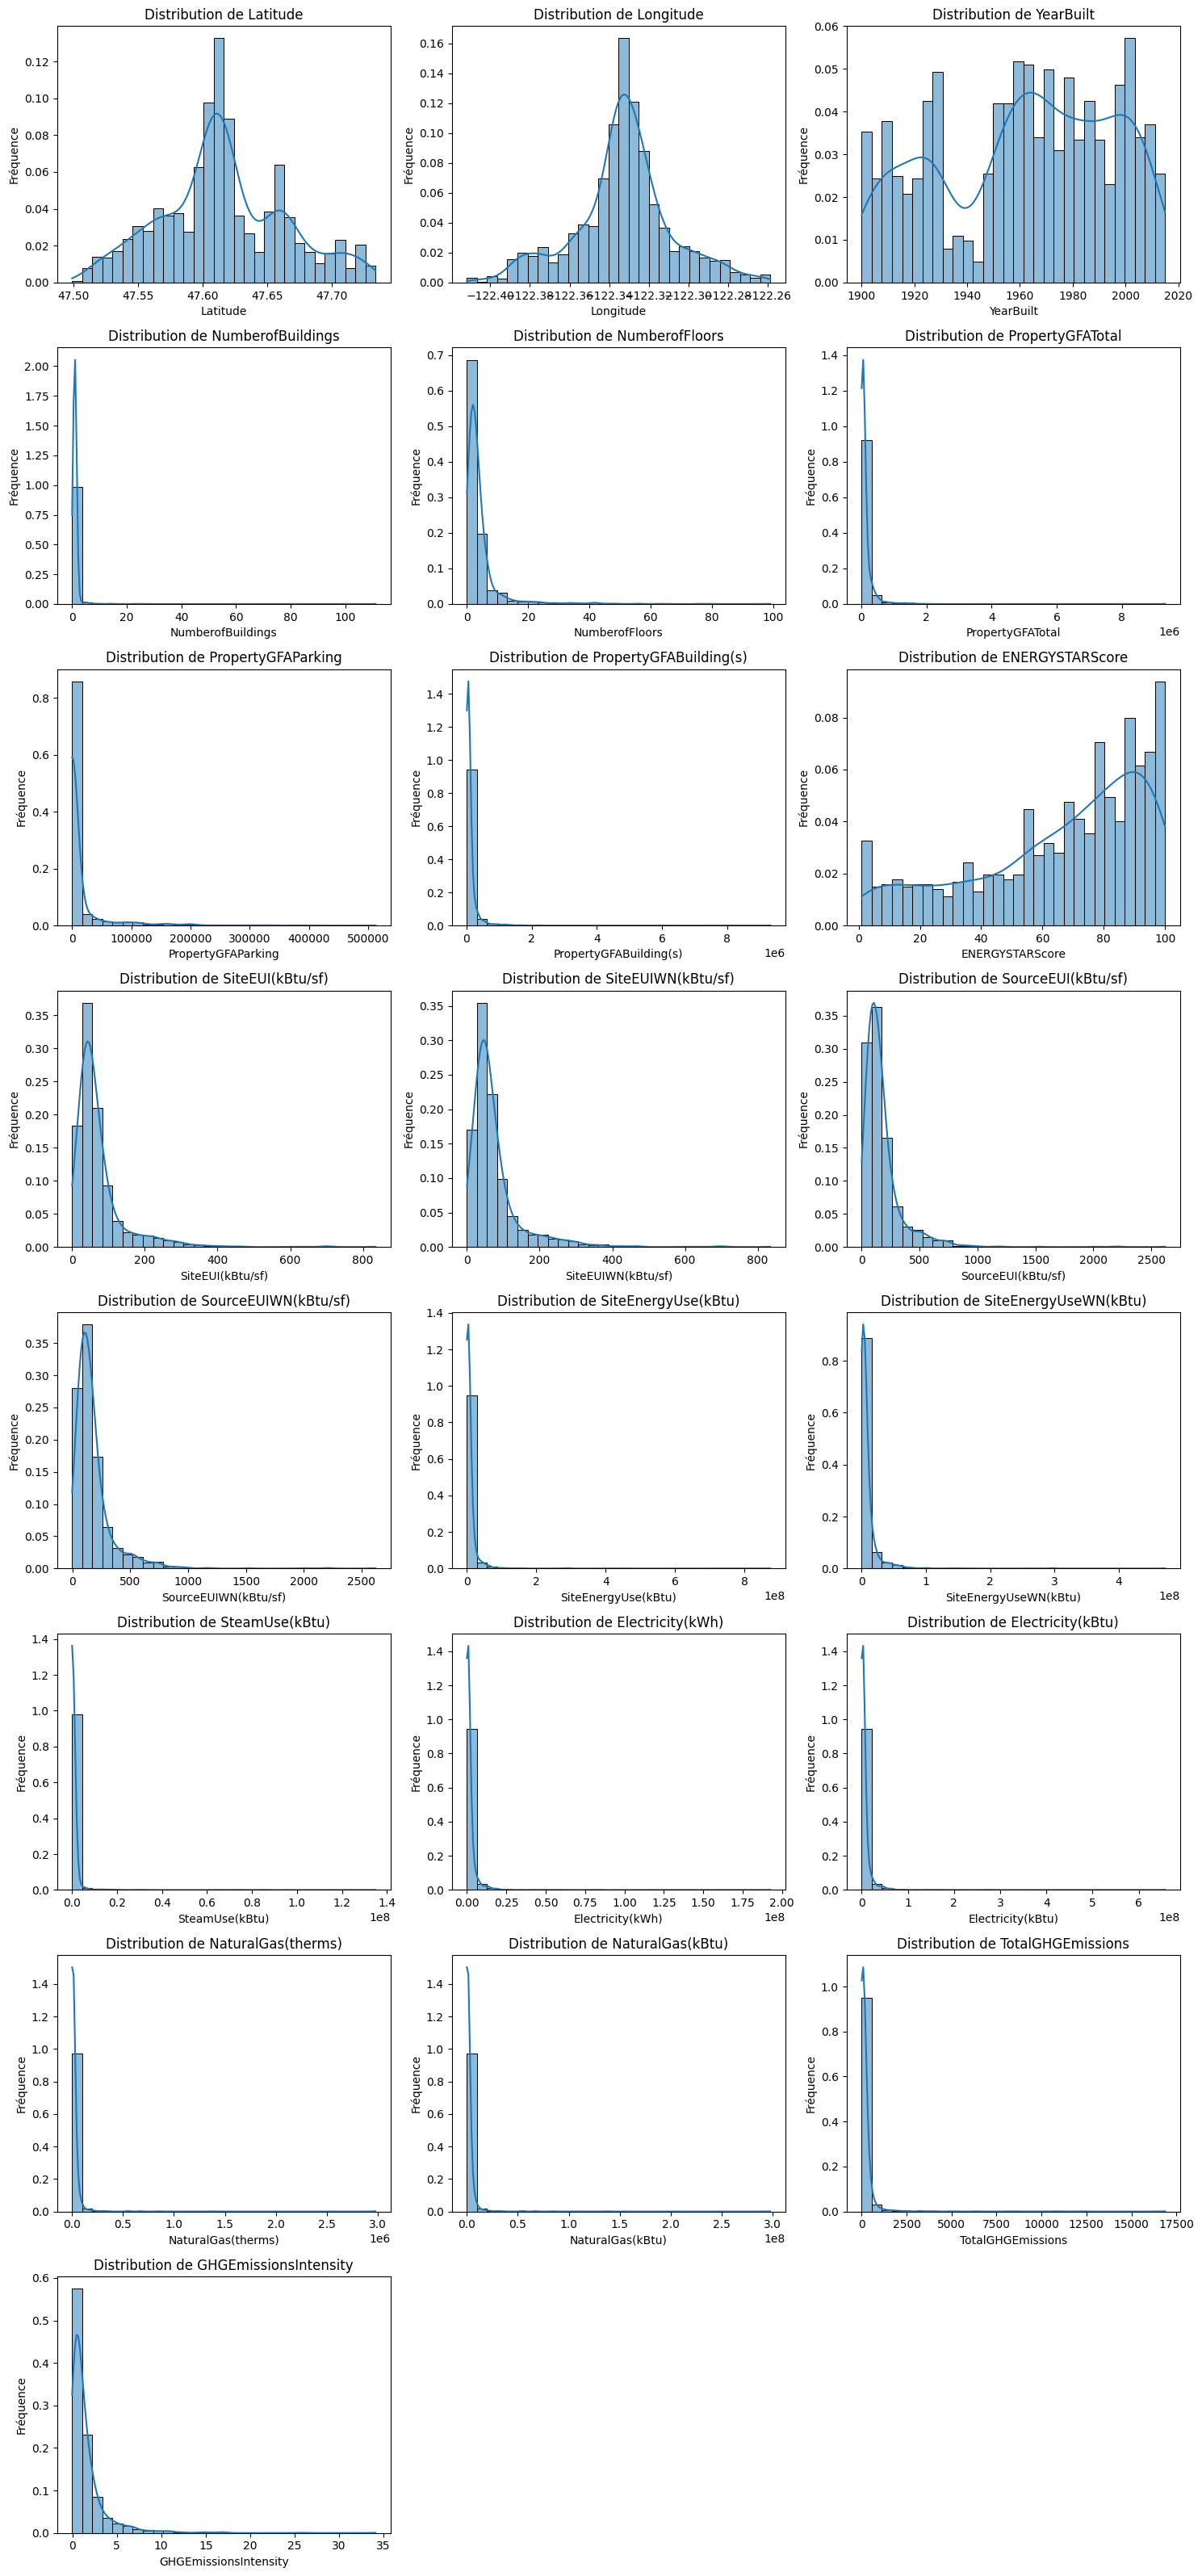

In [38]:
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, stat='probability', bins=30, ax=axes[i])
    axes[i].set_ylabel('Fréquence')
    axes[i].set_title(f'Distribution de {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

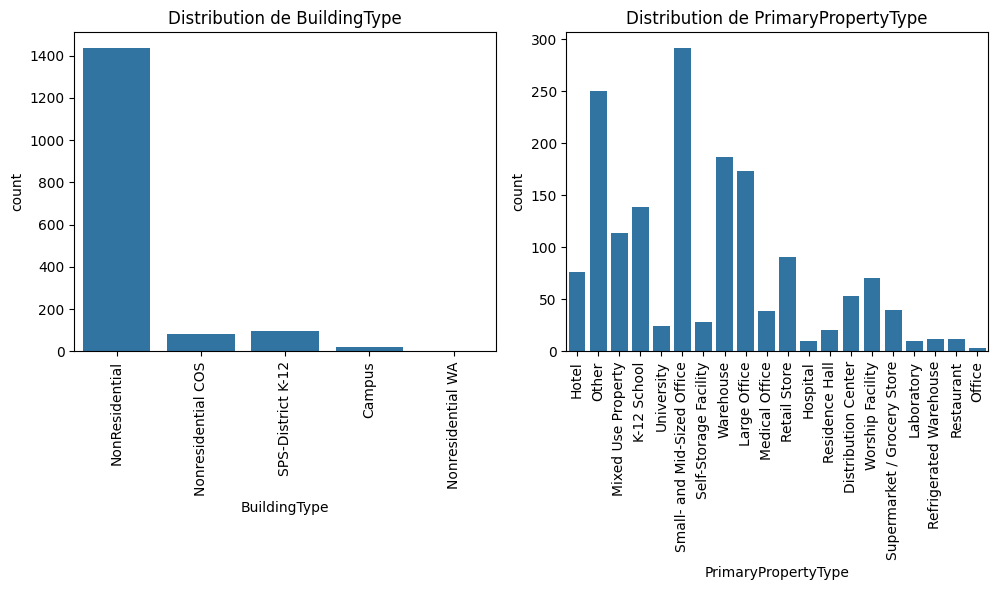

In [39]:
n_cols = 3  # Nombre de colonnes dans la grille
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 6*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
    axes[i].tick_params(axis='x', rotation = 90)  # Rotation des labels pour lisibilité

# Supprimer les axes vides si besoin
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Détection Outliers

In [40]:
col_outliers = ['PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

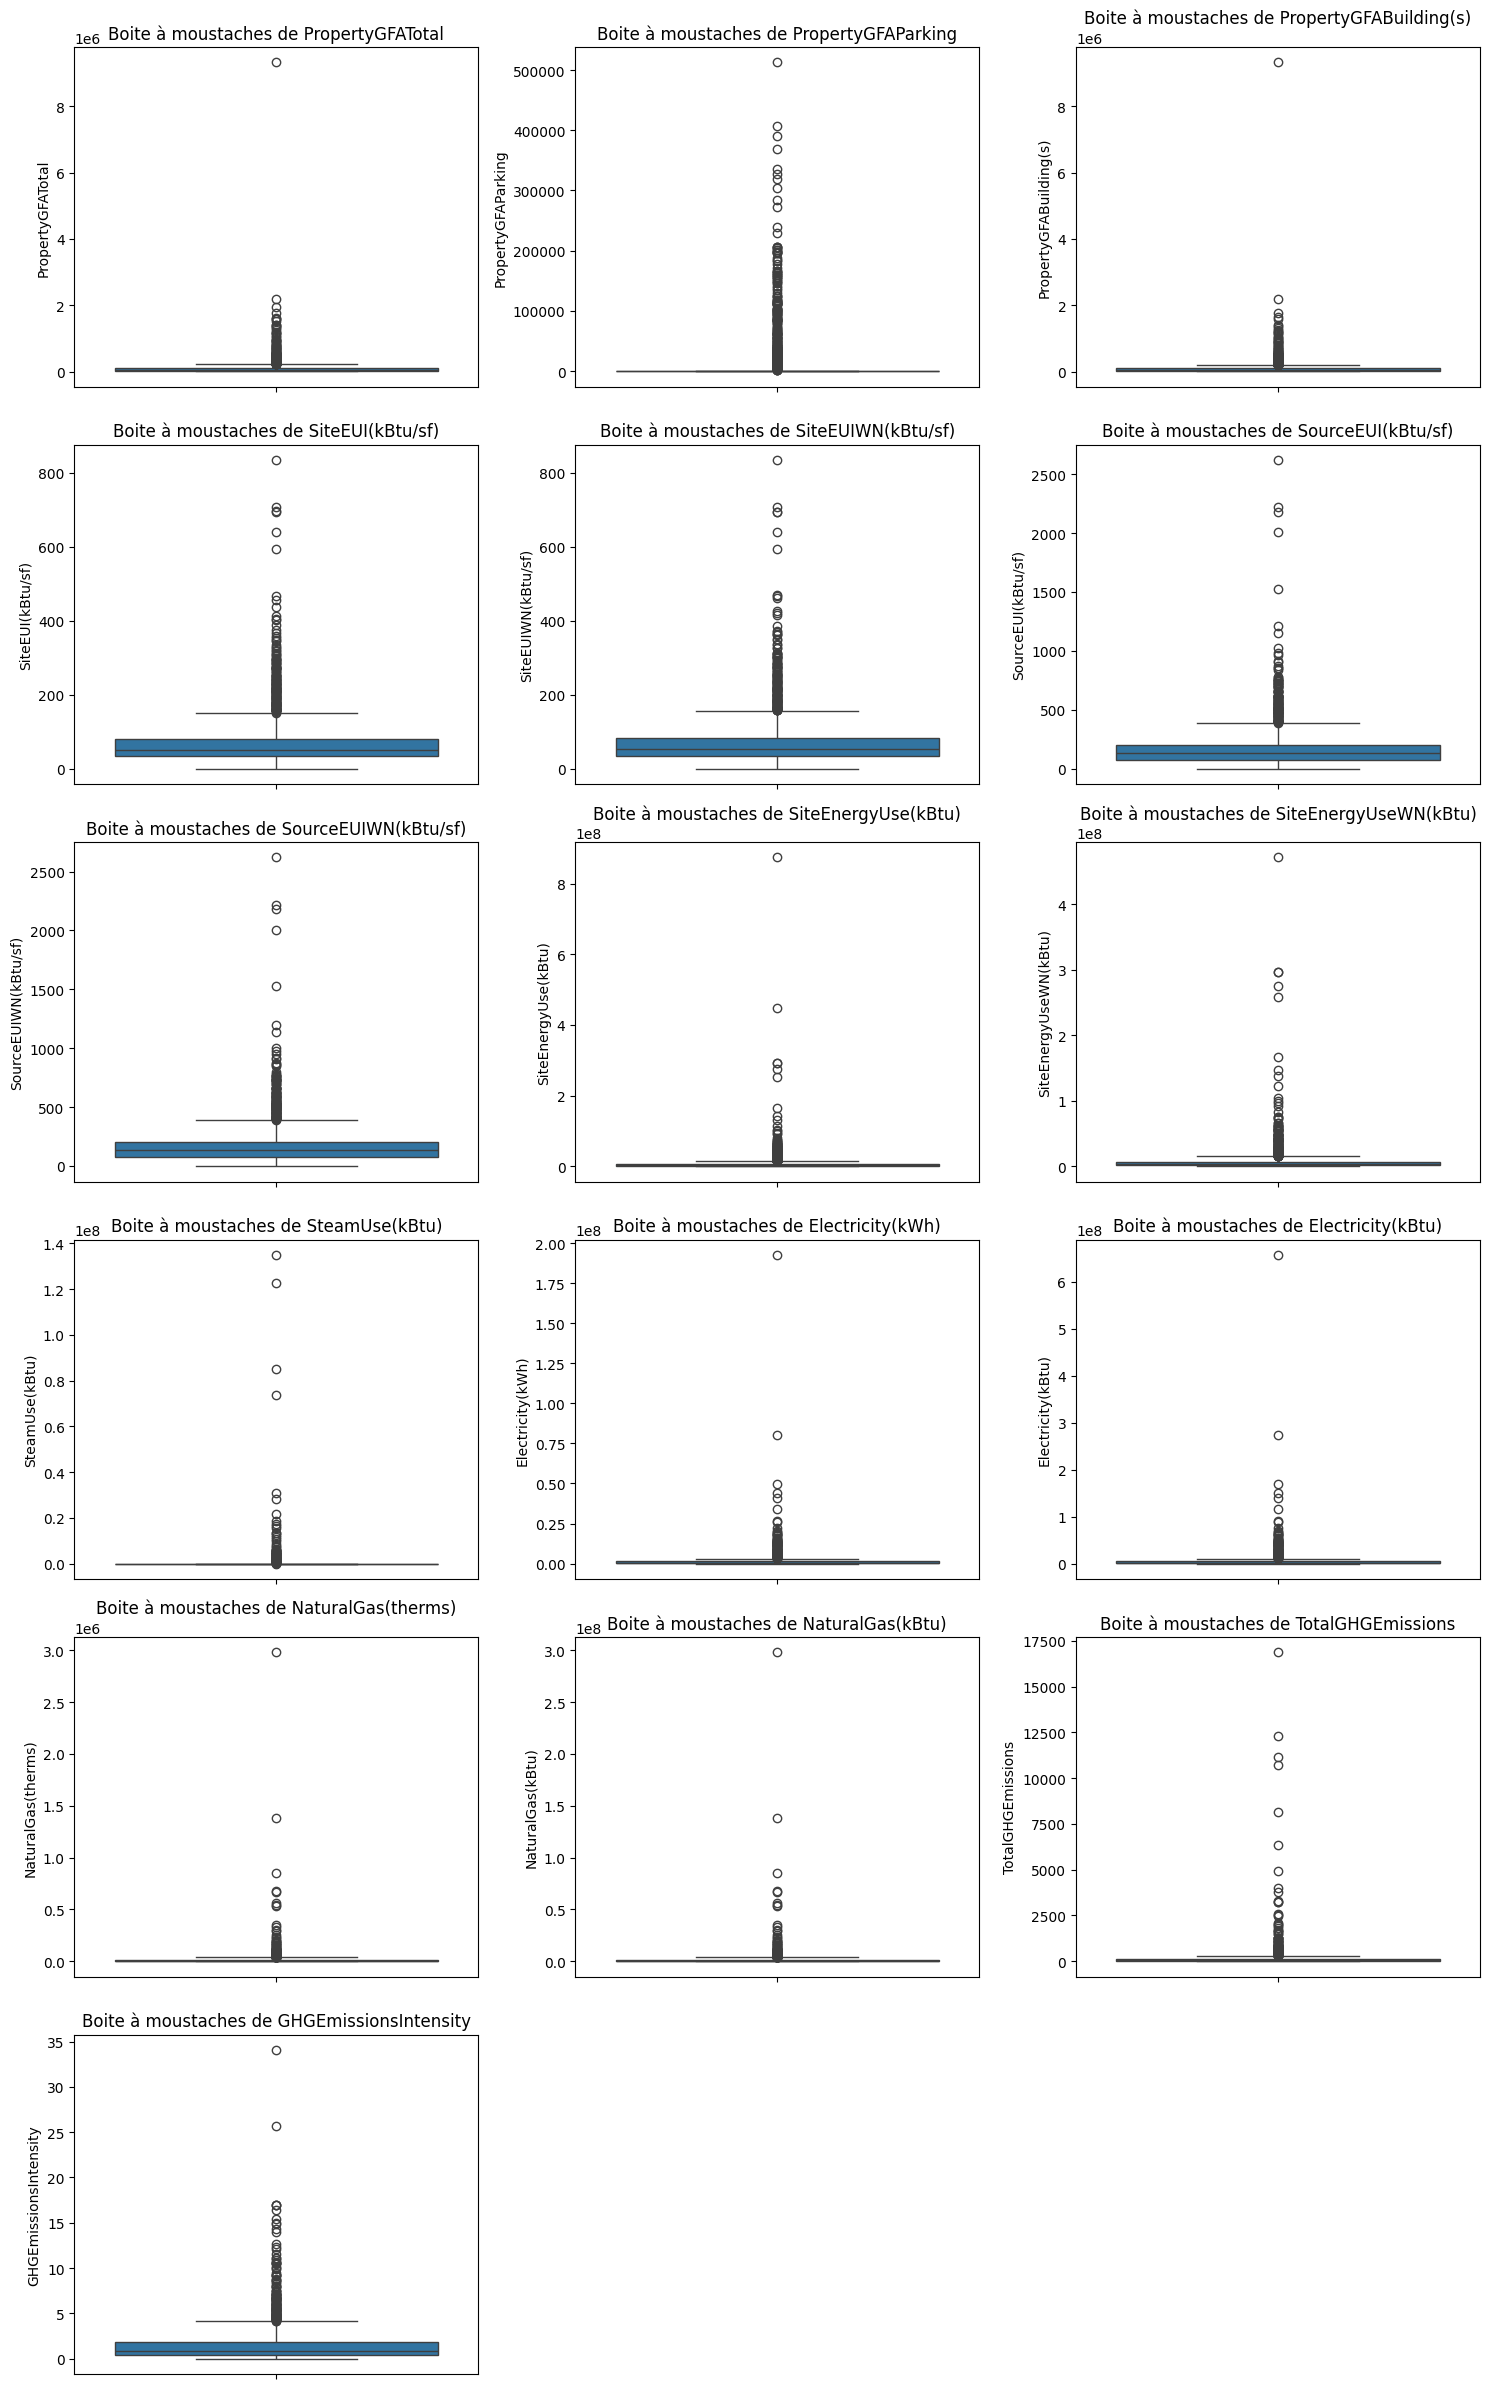

In [41]:
n_cols = 3
n_rows = (len(col_outliers) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(col_outliers):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Boite à moustaches de {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [42]:
df_log = df.copy()

df_log[col_outliers] = np.log1p(df_log[col_outliers])

outlier_index = set()

for col in col_outliers:
    Q1 = df_log[col].quantile(0.25)
    Q3 = df_log[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outlier = df_log[(df_log[col] < lower_bound) | (df_log[col] > upper_bound)].index
    outlier_index.update(col_outlier)

/home/romain/FormationOC/Anticipez les besoins en consommation d'energie/venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [43]:
df = df[~df.index.isin(outlier_index)]

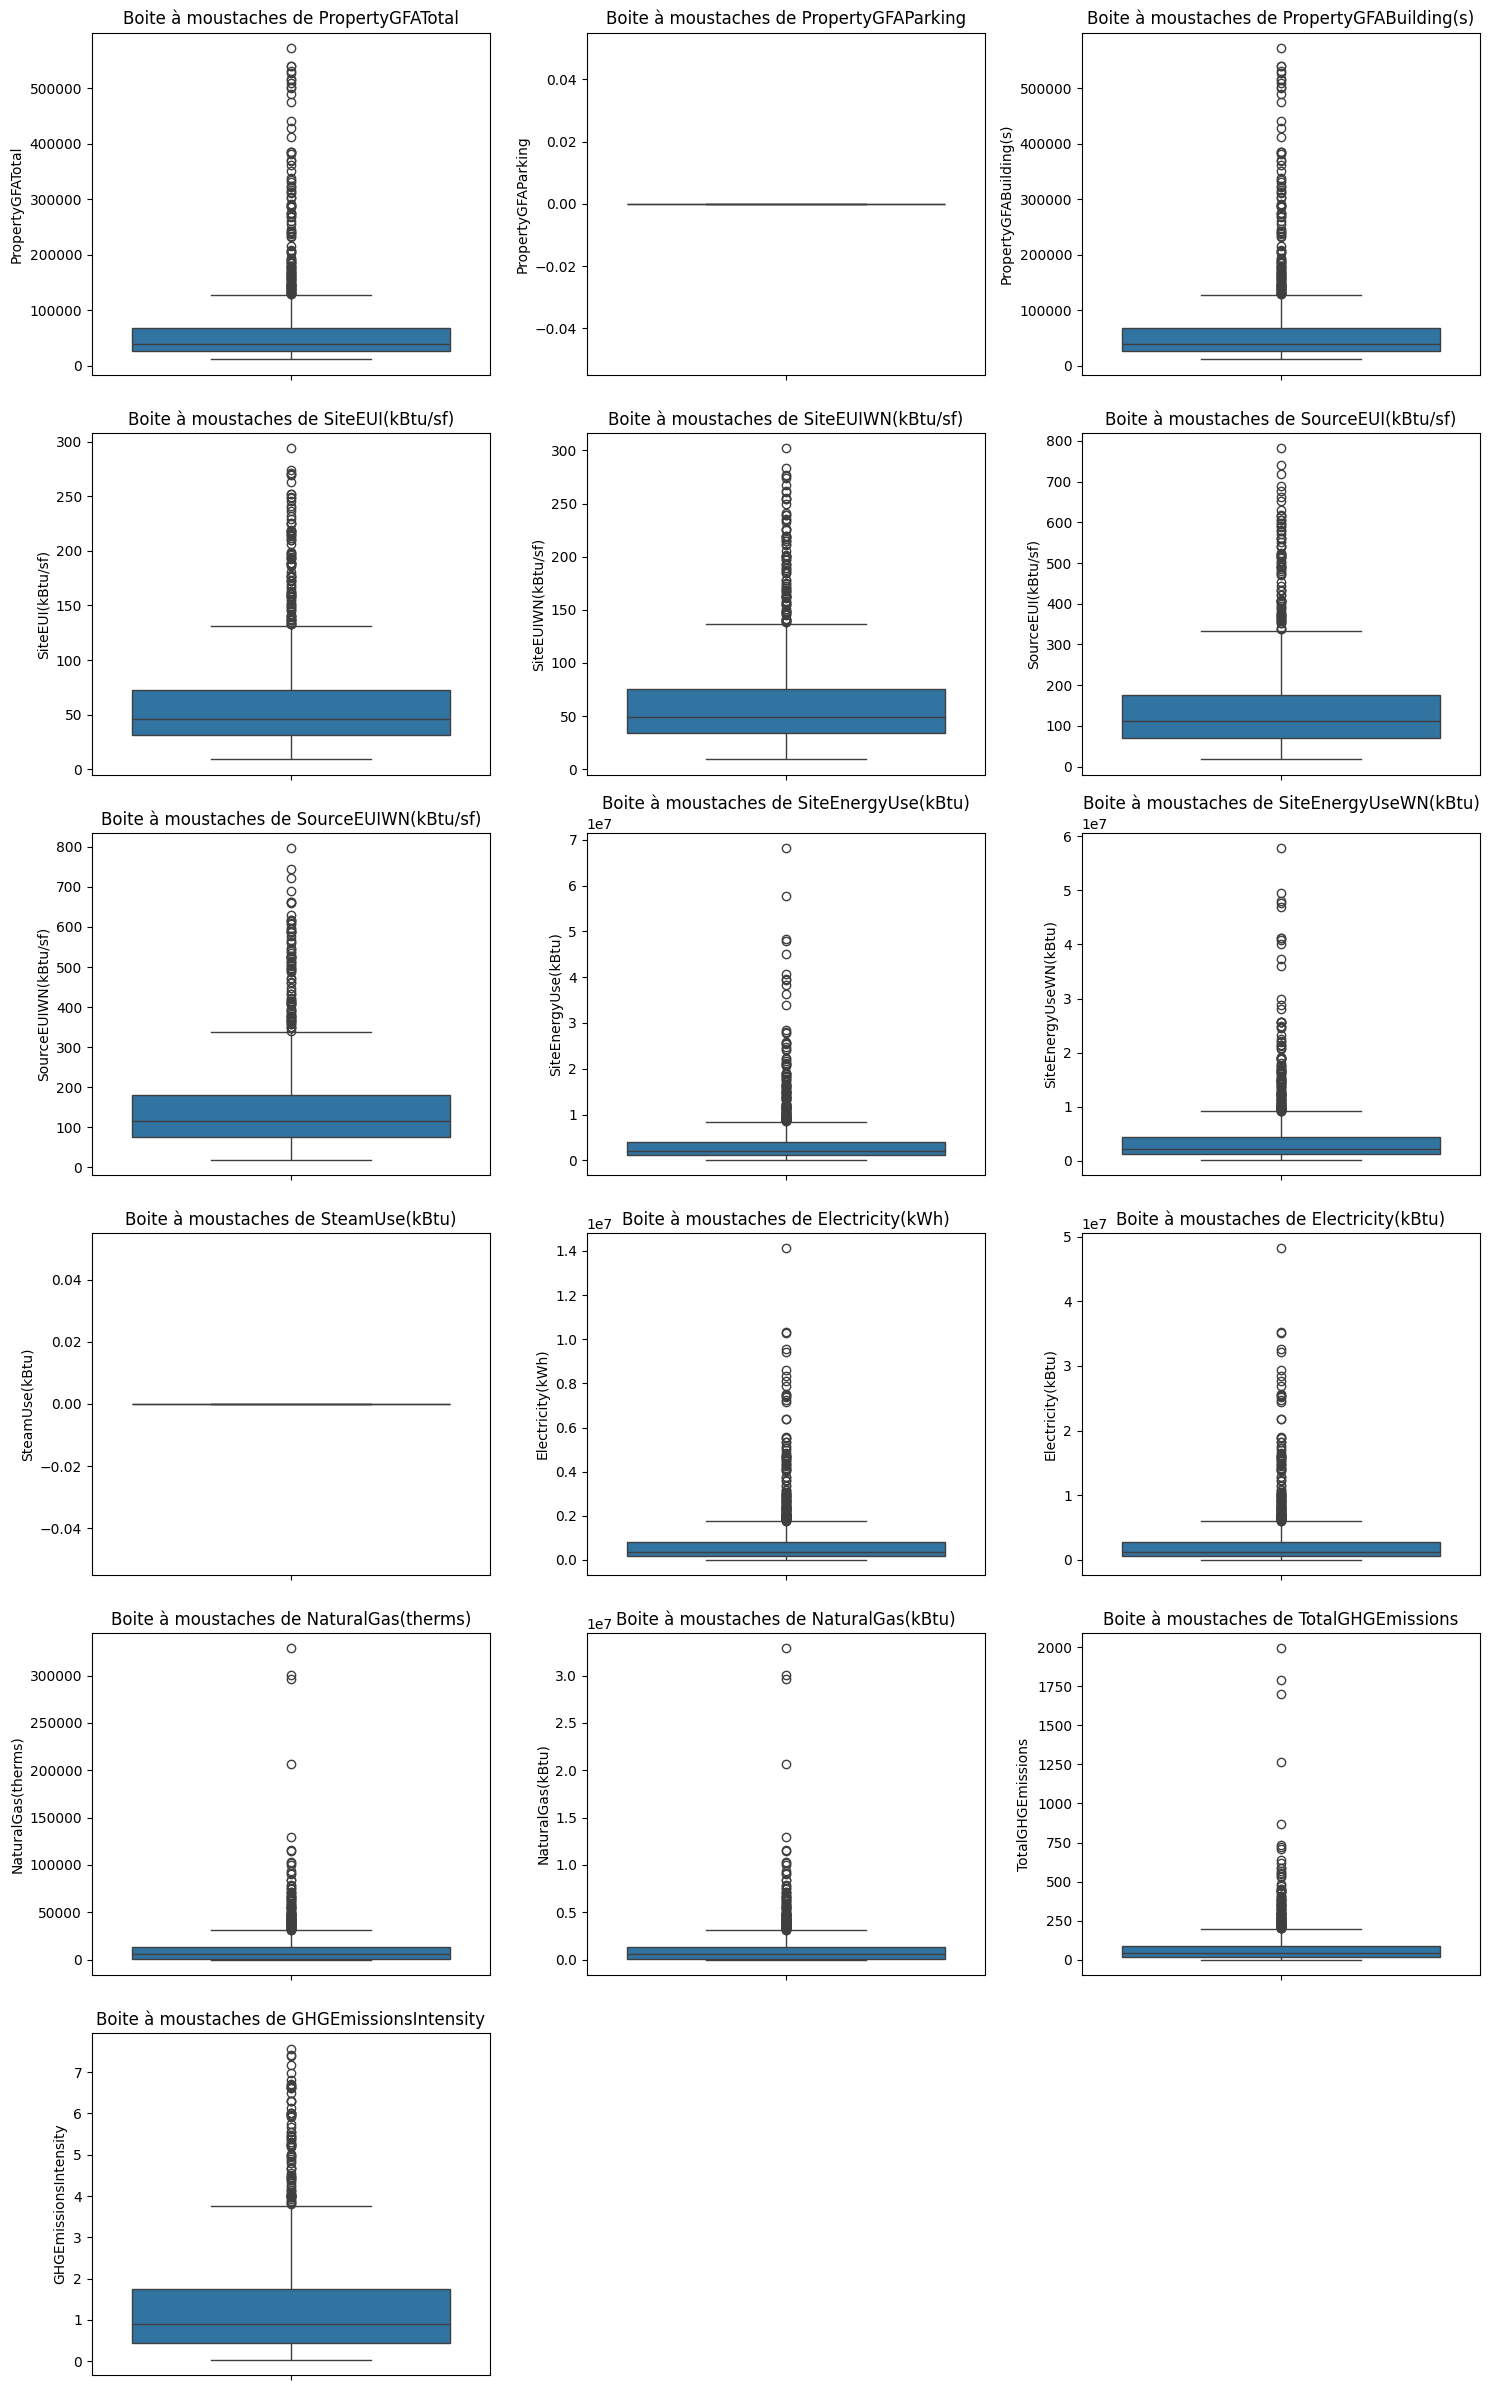

In [44]:
n_cols = 3
n_rows = (len(col_outliers) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(col_outliers):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Boite à moustaches de {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()